In [3]:
pip install xgboost

'DOSKEY' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
# import libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score


In [5]:
# import data
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


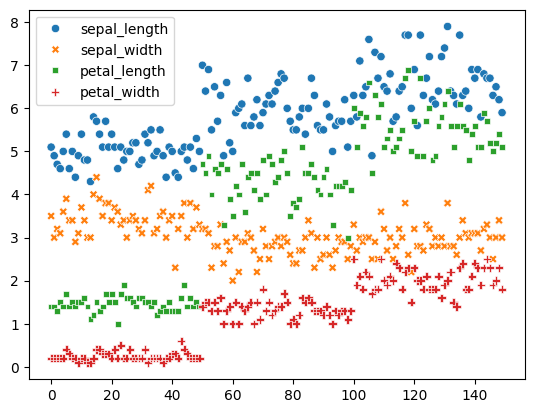

In [7]:
# plot the data as skatter plot
sns.scatterplot(df);

In [20]:
%%time
# split the data X and y
X = df.drop('species', axis=1)
y = df.species

# ENKODE THE TARGET VARIABLE y
le = LabelEncoder()
y = le.fit_transform(y)

# split the data into train and test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42) 

# train the Decision tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# evaluate the model
print('Decision Tree classification_report: \n', classification_report(y_pred, y_test))
print('Decision Tree confusion matrix: \n', confusion_matrix(y_pred, y_test))


Decision Tree classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Decision Tree confusion matrix: 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
CPU times: total: 31.2 ms
Wall time: 41 ms


In [21]:
%%time
# train the random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# evaluate the model
print('Random Forest classification_report: \n', classification_report(y_pred, y_test))
print('Random Forest confusion matrix: \n', confusion_matrix(y_pred, y_test))

Random Forest classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Random Forest confusion matrix: 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
CPU times: total: 281 ms
Wall time: 281 ms


In [23]:
%%time
# train the xgboost model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

# evaluate the model
print('XG Boost Classification report: \n', classification_report(y_pred, y_test))
print('XG Boost Confusion matrix: \n', confusion_matrix(y_pred, y_test))


XG Boost Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

XG Boost Confusion matrix: 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
CPU times: total: 750 ms
Wall time: 362 ms


In [24]:
df.shape

(150, 5)

In [ ]:
# make a bar plot showing each of the matrix w.r.t the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 4, 1)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred)])